<a href="https://colab.research.google.com/github/zolo012/Machine_learning/blob/main/Wine_quality_KNN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN regression

Creator: Bereczki Zoltán

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from collections import Counter
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import io

# 1. Read data
- Read the provided winequality-red.csv file.
- Check for missing values and that all entries are numerical. Also, check for duplicated entries (rows) and drop them.
- Use all columns except the last as features and the quality column as target.
- Make 80-20% train test split (use sklearn).
- Prepare a one-hot encoded version of the y_test and y_train values ie. make a six long vector of the 6 quality classes (3-8), with only one non-zero value, e.g. 3->[1,0,0,0,0,0], 4->[0,1,0,0,0,0], 5->[0,0,1,0,0,0] etc. (You can use pandas or sklearn for that.) You will have to use the one-hot encoded labels in the classification exercise only.
- Normalize the features by substracting the means and dividing by the standard deviation feature by feature. If you want to be very precise, you should use only the mean and std in the training set for normalization, because generally the test test is not available at training time.


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving winequality-red.csv to winequality-red.csv
User uploaded file "winequality-red.csv" with length 84199 bytes


## 1.a
 Read the provided winequality-red.csv file.

In [ ]:
# Read winequality red csv file

winequality_red_df = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']), sep = ';') # separator: ';'
winequality_red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
winequality_red_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
winequality_red_df.shape

(1599, 12)

## 1.b
Check for missing values and that all entries are numerical. Also, check for duplicated entries (rows) and drop them

In [ ]:
# Check missing values

winequality_red_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are not missing values.

In [ ]:
# Compute the sum of duplicated rows
winequality_red_df.duplicated().sum()

240

240 duplicated rows are in wine quality dataframe.

In [ ]:
# Remove duplicated rows
winequality_red_df.drop_duplicates(inplace=True)

In [ ]:
# Check all numbers?
winequality_red_df.select_dtypes(include=np.number).shape

(1359, 12)

In [ ]:
winequality_red_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All data is number in the dataframe.

## 1.c
Use all columns except the last as features and the quality column as target

In [ ]:
# Create features containing variable
x = winequality_red_df.iloc[:, 0:-1].values
x.shape

(1359, 11)

In [ ]:
# Create quality containing variable
y = winequality_red_df['quality']
y.shape

(1359,)

In [ ]:
winequality_red_df.quality.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

## 1.d
Split data into test (20%) and train (80%)

In [ ]:
# Split data into test (20%) and train (80%)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print('X train shape: {}\nX test shape: {}\nY train shape: {}\nY test shape: {}'.format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))

X train shape: (1087, 11)
X test shape: (272, 11)
Y train shape: (1087,)
Y test shape: (272,)


## 1.e
Prepare a one-hot encoded version of the y_test and y_train values

In [ ]:
print(y_train)
print(y_test)

754     6
491     7
608     6
926     6
303     5
       ..
154     5
317     6
1039    6
646     5
520     6
Name: quality, Length: 1087, dtype: int64
1052    5
415     5
59      6
306     5
527     6
       ..
718     5
66      5
408     6
801     5
746     6
Name: quality, Length: 272, dtype: int64


In [ ]:
# Make one-hot encoded version of the y_test 

onehot_encoder = OneHotEncoder(sparse=False)
y_test_arr = np.array(y_test).reshape(len(y_test), 1)
print(y_test_arr)
y_test_hot = onehot_encoder.fit_transform(y_test_arr)

[[5]
 [5]
 [6]
 [5]
 [6]
 [6]
 [6]
 [7]
 [6]
 [5]
 [7]
 [6]
 [5]
 [5]
 [5]
 [4]
 [4]
 [5]
 [6]
 [5]
 [6]
 [6]
 [5]
 [7]
 [7]
 [6]
 [6]
 [6]
 [6]
 [5]
 [5]
 [6]
 [7]
 [6]
 [7]
 [5]
 [5]
 [5]
 [3]
 [5]
 [6]
 [5]
 [6]
 [6]
 [6]
 [5]
 [6]
 [5]
 [5]
 [6]
 [5]
 [5]
 [6]
 [7]
 [6]
 [5]
 [7]
 [6]
 [5]
 [4]
 [7]
 [7]
 [5]
 [5]
 [6]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [6]
 [5]
 [5]
 [6]
 [5]
 [5]
 [6]
 [5]
 [6]
 [6]
 [7]
 [6]
 [6]
 [6]
 [7]
 [5]
 [7]
 [6]
 [6]
 [5]
 [6]
 [6]
 [5]
 [5]
 [5]
 [7]
 [5]
 [7]
 [5]
 [6]
 [6]
 [5]
 [4]
 [8]
 [5]
 [5]
 [6]
 [6]
 [6]
 [6]
 [7]
 [6]
 [5]
 [6]
 [8]
 [7]
 [5]
 [6]
 [5]
 [5]
 [6]
 [6]
 [5]
 [6]
 [6]
 [5]
 [5]
 [6]
 [6]
 [7]
 [5]
 [6]
 [7]
 [5]
 [5]
 [6]
 [5]
 [5]
 [5]
 [6]
 [5]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [5]
 [6]
 [6]
 [7]
 [6]
 [7]
 [5]
 [5]
 [6]
 [6]
 [5]
 [5]
 [5]
 [7]
 [6]
 [5]
 [5]
 [6]
 [7]
 [5]
 [6]
 [5]
 [6]
 [5]
 [6]
 [7]
 [7]
 [7]
 [5]
 [5]
 [6]
 [5]
 [6]
 [5]
 [5]
 [6]
 [5]
 [5]
 [6]
 [5]
 [5]
 [5]
 [5]
 [6]
 [6]
 [6]
 [5]
 [5]
 [5]
 [6]
 [5]


In [ ]:
print(y_test_hot)

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [ ]:
# Make one hot encoded version of y_train

y_train_arr = np.array(y_train).reshape(len(y_train), 1)
y_train_arr

array([[6],
       [7],
       [6],
       ...,
       [6],
       [5],
       [6]])

In [ ]:
y_train_hot = onehot_encoder.fit_transform(y_train_arr)
y_train_hot

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

## 1.f
Normalize the features by substracting the means and dividing by the standard deviation feature by feature.

In [ ]:
# Check x_train values before normalization
x_train

array([[ 7.8 ,  0.48,  0.68, ...,  3.09,  1.06,  9.1 ],
       [ 9.2 ,  0.41,  0.5 , ...,  3.34,  0.79, 13.3 ],
       [10.1 ,  0.65,  0.37, ...,  3.32,  0.64, 10.4 ],
       ...,
       [ 8.9 ,  0.5 ,  0.21, ...,  3.33,  0.83, 11.1 ],
       [ 7.3 ,  0.67,  0.05, ...,  3.4 ,  0.63, 10.1 ],
       [ 9.8 ,  0.25,  0.49, ...,  3.42,  0.9 , 10.  ]])

In [ ]:
# Make a dataframe from them
x_train_df = pd.DataFrame(data=x_train, columns=winequality_red_df.columns[:-1])
x_train_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.8,0.48,0.68,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.1
1,9.2,0.41,0.50,2.5,0.055,12.0,25.0,0.99520,3.34,0.79,13.3
2,10.1,0.65,0.37,5.1,0.110,11.0,65.0,1.00260,3.32,0.64,10.4
3,9.4,0.24,0.33,2.3,0.061,52.0,73.0,0.99786,3.47,0.90,10.2
4,7.4,0.67,0.12,1.6,0.186,5.0,21.0,0.99600,3.39,0.54,9.5
...,...,...,...,...,...,...,...,...,...,...,...
1082,7.1,0.43,0.42,5.5,0.070,29.0,129.0,0.99730,3.42,0.72,10.5
1083,9.6,0.77,0.12,2.9,0.082,30.0,74.0,0.99865,3.30,0.64,10.4
1084,8.9,0.50,0.21,2.2,0.088,21.0,39.0,0.99692,3.33,0.83,11.1
1085,7.3,0.67,0.05,3.6,0.107,6.0,20.0,0.99720,3.40,0.63,10.1


In [ ]:
# Normalize the features' values in dataframe
x_train_norm_df = (x_train_df - x_train_df.mean())/x_train_df.std()
x_train_norm_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.297457,-0.278017,2.086309,-0.613949,6.767541,-0.163279,-0.433177,-0.080510,-1.426511,2.340922,-1.250092
1,0.508436,-0.653892,1.164036,-0.003789,-0.689319,-0.353508,-0.640261,-0.819124,0.187035,0.764534,2.672857
2,1.026510,0.634824,0.497950,1.979232,0.449923,-0.448622,0.543074,3.199802,0.057951,-0.111237,-0.035846
3,0.623563,-1.566733,0.293001,-0.156329,-0.565038,3.451075,0.779741,0.625517,1.026079,1.406766,-0.222653
4,-0.527712,0.742217,-0.782984,-0.690219,2.024149,-1.019310,-0.758594,-0.384645,0.509744,-0.695085,-0.876478
...,...,...,...,...,...,...,...,...,...,...,...
1082,-0.700403,-0.546499,0.754137,2.284312,-0.378617,1.263440,2.436409,0.321382,0.703369,0.355841,0.057557
1083,0.738691,1.279182,-0.782984,0.301291,-0.130055,1.358554,0.809324,1.054565,-0.071133,-0.111237,-0.035846
1084,0.335744,-0.170624,-0.321848,-0.232599,-0.005774,0.502523,-0.226094,0.115005,0.122493,0.998073,0.617979
1085,-0.585276,0.742217,-1.141646,0.835182,0.387783,-0.924195,-0.788177,0.267072,0.574286,-0.169622,-0.316057


In [ ]:
# Convert normalized values back into array 
x_train_norm_arr = np.array(x_train_norm_df)
x_train_norm_arr

array([[-0.29745691, -0.27801653,  2.08630886, ..., -1.42651124,
         2.34092197, -1.25009244],
       [ 0.50843578, -0.65389212,  1.164036  , ...,  0.18703477,
         0.76453395,  2.67285687],
       [ 1.02650964,  0.63482418,  0.49795004, ...,  0.05795109,
        -0.11123717, -0.03584623],
       ...,
       [ 0.33574449, -0.17062351, -0.32184806, ...,  0.12249293,
         0.99807292,  0.61797866],
       [-0.58527572,  0.74221721, -1.14164616, ...,  0.57428581,
        -0.16962191, -0.31605689],
       [ 0.85381835, -1.51303633,  1.11279861, ...,  0.70336949,
         1.40676611, -0.40946045]])

In [ ]:
# Check x_test before normalization
x_test

array([[ 5.6  ,  0.605,  0.05 , ...,  3.56 ,  0.55 , 12.9  ],
       [ 8.6  ,  0.725,  0.24 , ...,  3.32 ,  1.07 ,  9.3  ],
       [ 7.3  ,  0.39 ,  0.31 , ...,  3.41 ,  0.54 ,  9.4  ],
       ...,
       [10.4  ,  0.34 ,  0.58 , ...,  3.19 ,  0.7  , 11.3  ],
       [ 8.6  ,  0.55 ,  0.09 , ...,  3.23 ,  0.44 , 10.   ],
       [ 8.2  ,  0.34 ,  0.38 , ...,  3.3  ,  0.47 ,  9.   ]])

In [ ]:
# Make a dataframe from them

x_test_df = pd.DataFrame(data=x_test, columns=winequality_red_df.columns[:-1])
x_test_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5.6,0.605,0.05,2.4,0.073,19.0,25.0,0.99258,3.56,0.55,12.9
1,8.6,0.725,0.24,6.6,0.117,31.0,134.0,1.00140,3.32,1.07,9.3
2,7.3,0.390,0.31,2.4,0.074,9.0,46.0,0.99620,3.41,0.54,9.4
3,7.6,0.620,0.32,2.2,0.082,7.0,54.0,0.99660,3.36,0.52,9.4
4,7.0,0.380,0.49,2.5,0.097,33.0,85.0,0.99620,3.39,0.77,11.4
...,...,...,...,...,...,...,...,...,...,...,...
267,8.4,0.560,0.04,2.0,0.082,10.0,22.0,0.99760,3.22,0.44,9.6
268,7.5,0.520,0.11,1.5,0.079,11.0,39.0,0.99680,3.42,0.58,9.6
269,10.4,0.340,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3
270,8.6,0.550,0.09,3.3,0.068,8.0,17.0,0.99735,3.23,0.44,10.0


In [ ]:
# Normalize by using x_train's mean and std and convert it back into array
x_test_norm_arr = np.array((x_test_df - x_train_df.mean())/x_train_df.std())
x_test_norm_arr

array([[-1.56385969,  0.39318987, -1.14164616, ...,  1.60695526,
        -0.63669984,  2.29924265],
       [ 0.1630532 ,  1.03754803, -0.16813591, ...,  0.05795109,
         2.39930671, -1.06328533],
       [-0.58527572, -0.76128515,  0.19052575, ...,  0.63882765,
        -0.69508458, -0.96988178],
       ...,
       [ 1.19920093, -1.02976771,  1.57393505, ..., -0.78109283,
         0.23907128,  0.80478577],
       [ 0.1630532 ,  0.09785905, -0.93669663, ..., -0.52292547,
        -1.27893199, -0.40946045],
       [-0.06720185, -1.02976771,  0.54918742, ..., -0.07113259,
        -1.10377777, -1.343496  ]])

In [ ]:
# Another shorter method: using StandardScaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit_transform(x_train)

array([[-0.29759382, -0.27814451,  2.08726918, ..., -1.42716786,
         2.3419995 , -1.25066786],
       [ 0.50866981, -0.65419311,  1.1645718 , ...,  0.18712086,
         0.76488587,  2.67408718],
       [ 1.02698214,  0.63511639,  0.49817925, ...,  0.05797777,
        -0.11128837, -0.03586273],
       ...,
       [ 0.33589903, -0.17070205, -0.3219962 , ...,  0.12254931,
         0.99853233,  0.61826311],
       [-0.58554512,  0.74255885, -1.14217165, ...,  0.57455016,
        -0.16969998, -0.31620237],
       [ 0.85421137, -1.51373277,  1.11331084, ...,  0.70369325,
         1.40741364, -0.40964892]])

In [ ]:
sc.transform(x_test)

array([[-1.56457953,  0.39337086, -1.14217165, ...,  1.60769494,
        -0.63699291,  2.30030099],
       [ 0.16312825,  1.03802561, -0.16821331, ...,  0.05797777,
         2.40041111, -1.06377476],
       [-0.58554512, -0.76163557,  0.19061345, ...,  0.63912171,
        -0.69540453, -0.97032821],
       ...,
       [ 1.19975292, -1.03024171,  1.57465953, ..., -0.78145237,
         0.23918133,  0.80515621],
       [ 0.16312825,  0.0979041 , -0.93712779, ..., -0.52316617,
        -1.27952068, -0.40964892],
       [-0.06723279, -1.03024171,  0.54944021, ..., -0.07116533,
        -1.10428584, -1.34411441]])

# 2. KNN regression

- Implement naive K nearest neighbour regression as a function only using python and numpy. 
- Use Euclidean distance as a measure of distance.
- Make prediction with k=20 for the test set using the training data.
- Plot the true and the predicted values from the test set on a scatterplot.



In [ ]:
# KNN regression function
def knn_regression(x_test, x_train, y_train, k=20):
  y_pred = []
  for i in range(len(x_test)):
    # calculate distances between current test point and all train set points
    distances = np.linalg.norm(x_train - x_test[i], axis=1)
    # sort the train point distances and select the first k number of closest points to current test point
    neighbors_ids = distances.argsort()[:k]
    # find the target of these train points
    neighbors_targets = y_train[neighbors_ids]
    # calculate the mean of them -> predicted target of current test point
    y_pred.append(neighbors_targets.mean())
  return y_pred

In [ ]:
# Run KNN regression function
predicted_y_list = knn_regression(x_test_norm_arr, x_train_norm_arr, y_train_arr)
predicted_y_list

[5.8,
 5.05,
 5.55,
 5.3,
 5.75,
 5.45,
 5.2,
 6.4,
 6.05,
 6.0,
 5.65,
 5.6,
 5.1,
 5.45,
 5.3,
 5.45,
 5.5,
 5.35,
 6.35,
 5.45,
 5.85,
 6.35,
 5.05,
 6.65,
 5.65,
 5.35,
 5.9,
 5.9,
 5.8,
 5.1,
 5.45,
 5.25,
 5.65,
 5.8,
 5.8,
 5.35,
 5.5,
 5.3,
 5.3,
 5.4,
 5.35,
 5.65,
 5.85,
 6.15,
 6.05,
 5.3,
 5.2,
 5.45,
 5.6,
 5.95,
 5.4,
 5.6,
 5.75,
 5.75,
 6.35,
 5.45,
 5.15,
 6.65,
 5.95,
 5.4,
 6.65,
 5.7,
 5.65,
 5.1,
 5.65,
 5.55,
 5.1,
 5.45,
 5.35,
 4.95,
 5.7,
 5.5,
 5.55,
 5.55,
 6.9,
 5.55,
 5.1,
 5.8,
 5.25,
 6.3,
 6.1,
 5.85,
 5.65,
 5.35,
 5.5,
 5.7,
 5.15,
 6.3,
 5.5,
 5.7,
 5.65,
 6.2,
 5.75,
 5.3,
 5.35,
 5.4,
 6.3,
 6.65,
 6.35,
 5.4,
 6.1,
 5.7,
 5.4,
 5.35,
 6.55,
 5.25,
 5.25,
 6.25,
 6.0,
 5.55,
 5.85,
 6.15,
 5.45,
 5.15,
 6.4,
 6.15,
 6.0,
 5.25,
 6.0,
 5.2,
 5.15,
 5.45,
 5.45,
 5.15,
 5.75,
 5.75,
 5.5,
 5.5,
 4.75,
 5.95,
 6.2,
 6.3,
 6.0,
 6.1,
 5.9,
 5.2,
 5.4,
 5.4,
 5.6,
 5.5,
 5.45,
 4.8,
 5.65,
 6.5,
 5.6,
 5.5,
 5.6,
 5.3,
 5.8,
 5.1,
 5.65,
 5.7,
 5.75,
 5.

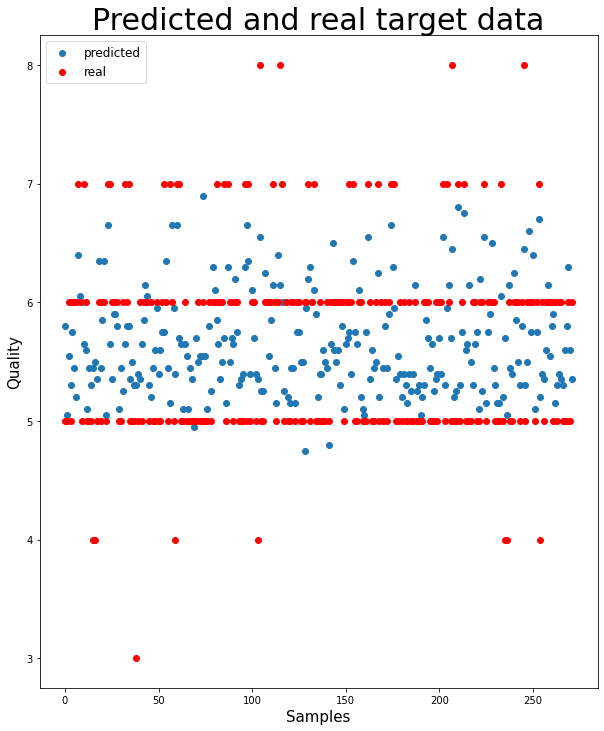

In [ ]:
plt.figure(figsize=(10, 12))
plt.title('Predicted and real target data', fontsize=30)
plt.xlabel('Samples', fontsize=15)
plt.ylabel('Quality', fontsize=15)
plt.scatter([i for i in range(len(predicted_y_list))], predicted_y_list, label='predicted')
plt.scatter([i for i in range(len(y_test_arr))], y_test_arr, c='red', label='real')
plt.legend(fontsize=12)

# 3. Weighted KNN regression
- Modify the knn_regression function by adding a weight to each neighbor that is inversely proportional to the distance.
- Make prediction with k=20 for the test set using the training data.
- Plot the true and the predicted values from the test set on a scatterplot.

In [ ]:
def knn_weighted_regression(x_test,x_train,y_train,k=20):
    y_pred = []
    for i in range(len(x_test)):
      # calculate distances between current test point and all train set points
      distances = np.linalg.norm(x_train - x_test[i], axis=1)
      # sort the train point distances and select the first k number of closest points to current test point
      neighbors_ids = distances.argsort()[:k]
      # find the target of these train points
      neighbors_targets = y_train[neighbors_ids]
      # Calculate their weights by using distances
      weight_list = [1/distance for distance in distances[neighbors_ids]]
      # Compute weight-based average -> predicted target(y_pred)
      y = sum([w*neighbors_targets[idx] for idx, w in enumerate(weight_list)])/sum(weight_list)
      y_pred.append(y)
    return y_pred

In [ ]:
# Run knn_weighted_regression
y_wpred_list = knn_weighted_regression(x_test_norm_arr, x_train_norm_arr, y_train_arr)
y_wpred_list = [y[0] for y in y_wpred_list]
y_wpred_list

[5.796990510378187,
 5.042251809656621,
 5.53250883078435,
 5.277818124303685,
 5.718267982022476,
 5.540562189497476,
 5.1881324675190506,
 6.422506374623573,
 6.038389759887745,
 5.976994067853191,
 5.636982319921639,
 5.596565243184118,
 5.086612659919399,
 5.413647099585963,
 5.282603585714757,
 5.458971055852396,
 5.476918867557942,
 5.357853605834301,
 6.345553770081878,
 5.452233447086351,
 5.82652247581663,
 6.33597354399352,
 5.0648944331222925,
 6.614139118117322,
 5.627130941221268,
 5.316599824565597,
 5.927913495898718,
 5.878330470310038,
 5.812144244001202,
 5.105809960708099,
 5.445671938773823,
 5.227131465134871,
 5.617977547436937,
 5.846048243603977,
 5.795173598566555,
 5.354743618295843,
 5.47583116607771,
 5.283580736046253,
 5.268671426406056,
 5.352226517047885,
 5.320158209559242,
 5.6552042133495535,
 5.849910344824544,
 6.153117450876543,
 6.076704316194565,
 5.30580285833947,
 5.181365240892418,
 5.353990631746236,
 5.6005365906343085,
 6.001869655196168,
 

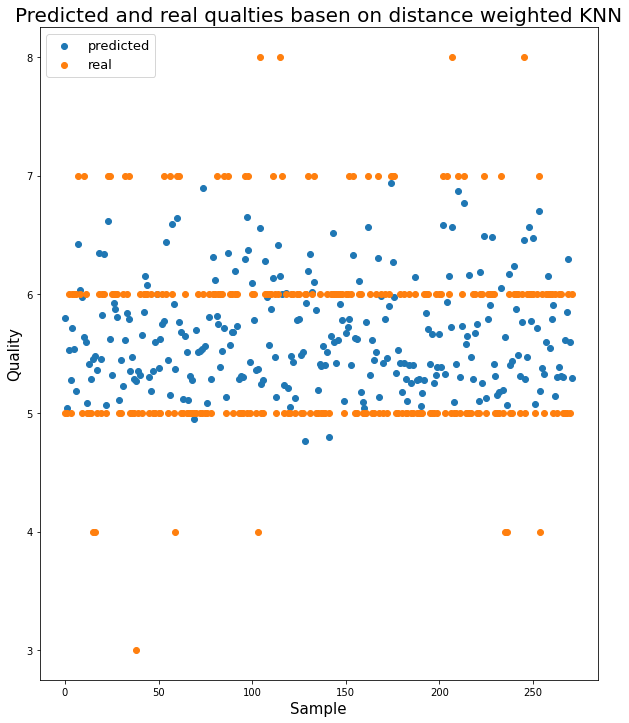

In [ ]:
# Plot knn_weighted predicted y values and the real one

plt.figure(figsize=(10, 12))
plt.title('Predicted and real qualties basen on distance weighted KNN', fontsize=20)
plt.xlabel('Sample', fontsize=15)
plt.ylabel('Quality', fontsize=15)

plt.scatter([id for id in range(len(y_test))], y_wpred_list, label='predicted')
plt.scatter([id for id in range(len(y_test))], y_test, label='real')
plt.legend(fontsize=(13))

# 4. KNN classification

- Implement the K-nearest neighbors classification algorithm using only pure Python3 and numpy! Use L2 distance to find the neighbors. The prediction for each class should be the number of neighbors supporting the given class divided by k (for example if k is 5 and we have 3 neighbors for class A, 2 for class B and 0 for class C neighbors, then the prediction for class A should be 3/5, for class B 2/5, for class C 0/5). Use the one-hot encoded labels!
- Make prediction with k=20 for the test set using the training data.

In [ ]:
def knn_classifier(x_test, x_train, y_train, k=20):
  y_pred = []
  for i in range(len(x_test)):
      # calculate distances between current test point and all train set points
      distances = np.linalg.norm(x_train - x_test[i], axis=1)
      # sort the train point distances and select the first k number of closest points to current test point
      neighbors_ids = distances.argsort()[:k]
      # find the target of these train points
      neighbors_targets = y_train[neighbors_ids]
      #print(neighbors_targets)
      # Decode the one hot encoded numbers
      neighbors_targets_dec = [np.argmax(target) + 3 for target in neighbors_targets]
      #print(neighbors_targets_dec)
      # Count the occurrences of all targets and make a dictionary: {target : occurence}
      targets, targets_occurrences = np.unique(neighbors_targets_dec, return_counts=True)
      targets_occurrences_dict = dict(zip(targets, targets_occurrences))
      #print(targets_occurrences_dict)
      # Compute probability of all possible targets(3-8)
      target_probability_list = []
      for target in range(3, 9):
        # If the target exists in dictionary calculate its probability
        if target in list(targets_occurrences_dict.keys()):
          probability = targets_occurrences_dict[target]/k
          target_probability_list.append(probability)
        elif target not in list(targets_occurrences_dict.keys()):
          target_probability_list.append(0)
    # Add the target probability list to result list (y_pred)
      y_pred.append(target_probability_list)

  return y_pred


In [ ]:
y_pred_classes_list = knn_classifier(x_test_norm_arr, x_train_norm_arr, y_train_hot)
y_pred_classes_list

[[0, 0, 0.3, 0.6, 0.1, 0],
 [0, 0, 0.95, 0.05, 0, 0],
 [0, 0.05, 0.4, 0.5, 0.05, 0],
 [0, 0.15, 0.45, 0.35, 0.05, 0],
 [0, 0, 0.4, 0.45, 0.15, 0],
 [0, 0, 0.65, 0.25, 0.1, 0],
 [0, 0.05, 0.75, 0.15, 0.05, 0],
 [0, 0, 0.05, 0.55, 0.35, 0.05],
 [0, 0, 0.2, 0.55, 0.25, 0],
 [0, 0, 0.25, 0.5, 0.25, 0],
 [0, 0.05, 0.35, 0.5, 0.1, 0],
 [0, 0, 0.45, 0.5, 0.05, 0],
 [0, 0, 0.9, 0.1, 0, 0],
 [0, 0.05, 0.45, 0.5, 0, 0],
 [0, 0, 0.7, 0.3, 0, 0],
 [0, 0, 0.55, 0.45, 0, 0],
 [0, 0.05, 0.5, 0.35, 0.1, 0],
 [0, 0, 0.7, 0.25, 0.05, 0],
 [0, 0, 0.05, 0.6, 0.3, 0.05],
 [0, 0.05, 0.45, 0.5, 0, 0],
 [0, 0, 0.2, 0.75, 0.05, 0],
 [0, 0, 0.05, 0.6, 0.3, 0.05],
 [0, 0.15, 0.65, 0.2, 0, 0],
 [0, 0, 0, 0.4, 0.55, 0.05],
 [0.05, 0.05, 0.25, 0.5, 0.15, 0],
 [0, 0.25, 0.15, 0.6, 0, 0],
 [0, 0, 0.35, 0.4, 0.25, 0],
 [0, 0, 0.45, 0.2, 0.35, 0],
 [0, 0, 0.25, 0.7, 0.05, 0],
 [0, 0, 0.9, 0.1, 0, 0],
 [0, 0, 0.65, 0.25, 0.1, 0],
 [0, 0.1, 0.55, 0.35, 0, 0],
 [0, 0, 0.4, 0.55, 0.05, 0],
 [0, 0, 0.4, 0.45, 0.1, 0.05],
 [

In [ ]:
def knn_classify(pred_list):
  return [np.argmax(prob_list) + 3 for prob_list in pred_list]

In [ ]:
y_pred_class_list = knn_classify(y_pred_classes_list)
y_pred_class_list

[6,
 5,
 6,
 5,
 6,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 5,
 6,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 5,
 7,
 6,
 6,
 6,
 5,
 6,
 5,
 5,
 5,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 6,
 6,
 5,
 5,
 6,
 6,
 7,
 6,
 5,
 7,
 6,
 6,
 7,
 6,
 6,
 5,
 6,
 5,
 5,
 6,
 5,
 5,
 6,
 5,
 6,
 6,
 7,
 6,
 5,
 6,
 5,
 7,
 7,
 6,
 5,
 5,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 6,
 7,
 6,
 5,
 6,
 6,
 5,
 5,
 6,
 5,
 5,
 6,
 6,
 5,
 6,
 6,
 5,
 5,
 6,
 6,
 6,
 5,
 6,
 5,
 5,
 5,
 6,
 5,
 6,
 6,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 6,
 5,
 6,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 5,
 6,
 5,
 5,
 5,
 6,
 5,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 6,
 6,
 5,
 6,
 5,
 6,
 6,
 5,
 6,
 5,
 6,
 5,
 6,
 7,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 6,
 5,
 7,
 5,
 6,
 6,
 6,
 6,
 5,
 5,
 7,
 5,
 6,
 7,
 6,
 6,
 6,
 5,
 5,
 5,
 6,
 5,
 6,
 5,
 6,
 5,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 6,
 5,
 6,
 5,
 6,
 5,
 5,
 6,
 6,
 5,
 5,
 6,
 7,
 5,
 6,
 7,
 6,


# 5. Compare the models

- Make a baseline model: this can be the mean value of the training labels for every sample.
- Compare the regression and classification models to the baseline: You can do this by rounding the continous predictions of the regression to the nearest integer. Calculate the accuracy (fraction of correctly classified samples) of the models.
- Check your KNN implementations by running the sklearn built-in model. You can run it for any model you implented. The predictions should be the same as yours.
- Write down your observations.

For classification the **mode** can be used as a baseline

In [ ]:
# Build baseline model

# 1. find the mode of quality types in training set
mode_quality = statistics.mode(y_train)

# 2. build a model that contains only the mode with the length of test set
y_pred_base = [5] * len(y_test)

# 3. Calculate its accurancy score
score = accuracy_score(y_test, y_pred_base)

print('The mode: {}\nThe accuracy of baseline model: {:.0%}'.format(mode_quality, score))

The mode: 5
The accuracy of baseline model: 42%


In [ ]:
# Run accuracy test for other models as well

# 1. KNN regression
mode_quality_knn = statistics.mode(np.round(predicted_y_list))
knn_regr_score = accuracy_score(y_test, np.round(predicted_y_list))

# 2. Weighted KNN regression
mode_quality_wknn = statistics.mode(np.round(y_wpred_list))
wknn_regr_score = accuracy_score(y_test, np.round(y_wpred_list))

# 3. KNN classification
mode_quality_knnc = statistics.mode(y_pred_class_list)
knn_classif_score = accuracy_score(y_test, y_pred_class_list)

print('1. KNN regression:\nMode: {}\nAccuracy: {}'.format(mode_quality_knn, knn_regr_score))
print('\n2. Weighted KNN regression:\nMode: {}\nAccuracy: {}'.format(mode_quality_wknn, wknn_regr_score))
print('\n3. KNN classification:\nMode: {}\nAccuracy: {}'.format(mode_quality_knnc, knn_classif_score))

1. KNN regression:
Mode: 6.0
Accuracy: 0.6066176470588235

2. Weighted KNN regression:
Mode: 6.0
Accuracy: 0.6139705882352942

3. KNN classification:
Mode: 6
Accuracy: 0.5735294117647058


## Check your KNN implementations by running the sklearn built-in model. 

In [ ]:
knn = KNeighborsClassifier(20)
knn.fit(x_train, y_train)
sklearn_knn_class = knn.predict(x_test)

sklearn_knn_class_mode = Counter(sklearn_knn_class).most_common()[0]
sklearn_knn_class_score = accuracy_score(y_test, sklearn_knn_class)
print('\n4. KNN classification by using sklearn:\nMode: {}\nAccuracy: {}'.format(sklearn_knn_class_mode, sklearn_knn_class_score))


4. KNN classification by using sklearn:
Mode: (5, 147)
Accuracy: 0.5183823529411765


All in all we can say that the KNN method really works well in both cases when we use it for either classification or regression to find out the target/class of a new incoming data/points by using only the features of new data compared to training set data. Thus similar attracts similar concepts performs well to answer scientific questions. 
However the weighted KNN has done the best, since it's logical the more similar (closer) points have a higher impact on the new point. 
Must mention KNN classification can be used with discrete space while KNN regression with continouse space. 
In this case the KNN regression (weighted) achieved better accuracy than the KNN classification despite the target (quality) was discrete and not continous, but the cause of this should be that the predicted values of KNN regression were rounded to the closest integer which helped the better prediction. 